In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Importing Stockland Visitation Data with Visitations this and last year
xlsfile=pd.ExcelFile('/Users/mithil800/Downloads/Stockland - Visitation Data-1.xlsx')
df=xlsfile.parse('Data')

In [4]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var
0,Baldivis,2022-01-01,00:00:00,NaN,NaN,NaN
1,Baldivis,2022-01-01,01:00:00,NaN,NaN,NaN
2,Baldivis,2022-01-01,02:00:00,NaN,NaN,NaN
3,Baldivis,2022-01-01,03:00:00,NaN,NaN,NaN
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0
...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65160 entries, 0 to 65159
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Asset            65160 non-null  object        
 1   Date             65160 non-null  datetime64[ns]
 2   Time             65160 non-null  object        
 3   Count Last Year  54998 non-null  float64       
 4   Count This Year  56763 non-null  float64       
 5   Count Var        56763 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.0+ MB


#### Which Asset had the highest and least visitations last year and this year?
#### which month recorded the highest visitations in each of these assets?
#### which month recorded the least visitations in each of these assets?
#### what was the weather condition during the month when highest visitation was recorded?
#### what was the weather condition during the month when least visitation was recorded?

In [6]:
# Cleaning null values by dropping rows with missing count this or last year values as if there are less than 6 data entries in a row, that row has to be dropped.
df.dropna(thresh=6,inplace=True)

In [7]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0
...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0


<AxesSubplot:>

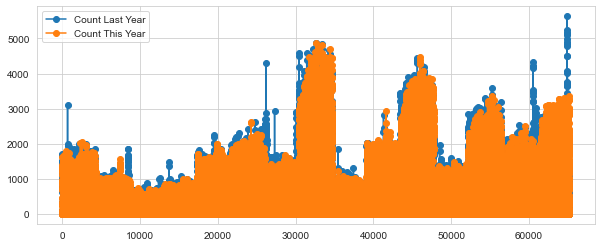

In [8]:
df[['Count Last Year','Count This Year']].plot(figsize=(10,4),marker='o')

In [9]:
# Adding a month column for monthly analysis
df['Month']=pd.DatetimeIndex(df['Date']).month_name()
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,January
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,January
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,January
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,January
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,January
...,...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,June
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,June
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,June
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,June


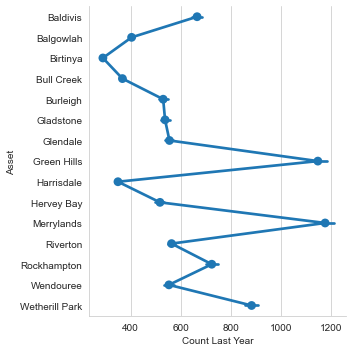

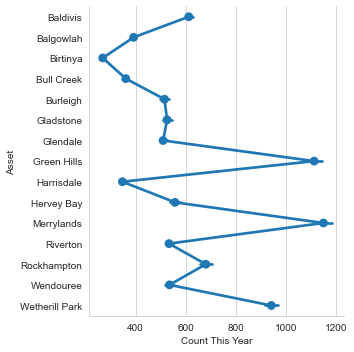

In [10]:
# Visualisations for count this and last year according to Assets(Stockland shopping malls)
sns.catplot(x='Count Last Year',y='Asset',kind='point',data=df)
sns.catplot(x='Count This Year',y='Asset',kind='point',data=df)

### Last year (Most Visitations)- Merrylands followed by Green Hills <br> (Least Visitations)- Birtinya followed by harrisdale
### This year (Most Visitations)- Merrylands followed by Green Hills <br> (Least Visitations)- Birtinya followed by harrisdale

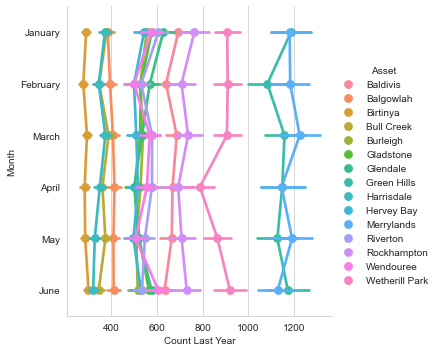

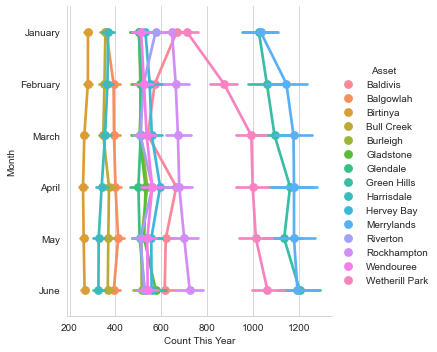

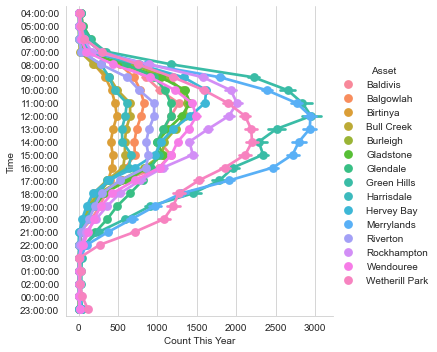

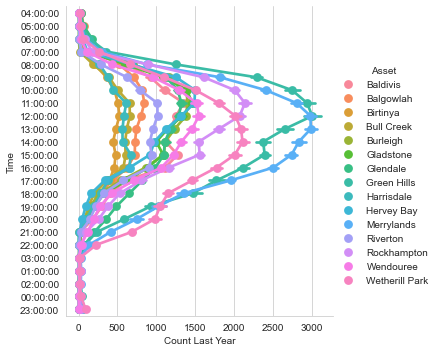

In [11]:
# Catplots visualising visitations accourding to month and time
sns.catplot(x='Count Last Year',y='Month',hue='Asset',data=df,kind='point')
sns.catplot(x='Count This Year',y='Month',hue='Asset',data=df,kind='point')
sns.catplot(x='Count This Year',y='Time',hue='Asset',data=df,kind='point',grid=True)
sns.catplot(x='Count Last Year',y='Time',hue='Asset',data=df,kind='point',grid=True)

### Highest visitations in Merrylands last year were recorded in March whereas least visitations were recorded in June. On the contrary, June recorded highest visitations this year. 12pm- 1PM has been the busiest time frame with big crowds.

In [12]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,January
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,January
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,January
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,January
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,January
...,...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,June
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,June
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,June
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,June


In [13]:
# Creating a suburb map for mapping assets according to suburbs
suburb_map={'Baldivis':'Regional','Balgowlah':'Metro','Birtinya':'Regional','Bull Creek':'Regional','Burleigh':'Regional','Gladstone':'Regional','Glendale':'Regional','Green Hills':'Regional','Harrisdale':'Regional','Hervey Bay':'Regional','Merrylands':'Metro','Riverton':'Regional','Rockhampton':'Regional','Wendouree':'Regional','Wetherill Park':'Metro'}

In [14]:
# Adding suburb map
df['Suburb Areas']= df['Asset'].map(suburb_map)

In [15]:
# Creating a state map for mapping assets according to states
state_map={'Baldivis':'WA','Balgowlah':'NSW','Birtinya':'QLD','Bull Creek':'WA','Burleigh':'QLD','Gladstone':'QLD','Glendale':'NSW','Green Hills':'NSW','Harrisdale':'WA','Hervey Bay':'QLD','Merrylands':'NSW','Riverton':'WA','Rockhampton':'QLD','Wendouree':'VIC','Wetherill Park':'NSW'}

In [16]:
# Adding state map
df['State']=df['Asset'].map(state_map)

In [17]:
# Dataframe with newly created state and suburb columns
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,January,Regional,WA
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,January,Regional,WA
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,January,Regional,WA
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,January,Regional,WA
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,January,Regional,WA
...,...,...,...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,June,Metro,NSW
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,June,Metro,NSW
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,June,Metro,NSW
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,June,Metro,NSW


In [18]:
weather_station_map={'Baldivis':'Hopelands','Balgowlah':'Sydney Harbour','Birtinya':'Sunshine Coast Airport','Bull Creek':'Jandakot','Burleigh':'Coolangatta','Gladstone':'Gladstone Airport','Glendale':'Newcastle Nobbys','Green Hills':'Maitland Airport','Harrisdale':'Jandakot','Hervey Bay':'Hervey Bay','Merrylands':'Bankstown ','Riverton':'Jandakot','Rockhampton':'Rockhampton','Wendouree':'Ballarat','Wetherill Park':'Horsley Park'}

In [19]:
df['Weather Station']= df['Asset'].map(weather_station_map)

In [20]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,January,Regional,WA,Hopelands
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,January,Regional,WA,Hopelands
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,January,Regional,WA,Hopelands
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,January,Regional,WA,Hopelands
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,January,Regional,WA,Hopelands
...,...,...,...,...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,June,Metro,NSW,Horsley Park
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,June,Metro,NSW,Horsley Park
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,June,Metro,NSW,Horsley Park
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,June,Metro,NSW,Horsley Park


In [21]:
# Importing Daily Rainfall data csv files obtained through BOM website(Bureau Of Meteorology)
Baldivis_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Baldivis Rainfall.csv')
Balgowlah_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Balgowlah Rainfall.csv')
Birtinya_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Birtinya Rainfall.csv')
BullCreek_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Bull Creek-Riverton-Harrisdale Rainfall.csv')
Burleigh_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Burleigh Rainfall.csv')
Gladstone_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Gladstone Rainfall.csv')
Glendale_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Glendale Rainfall.csv')
GreenHills_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Green Hills Rainfall.csv')
Harrisdale_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Bull Creek-Riverton-Harrisdale Rainfall.csv')
HerveyBay_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Hervey Bay Rainfall.csv')
Merrylands_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Merrylands Rainfall.csv')
Riverton_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Bull Creek-Riverton-Harrisdale Rainfall.csv')
Rockhampton_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Rockhampton Rainfall.csv')
Wendouree_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Wendouree Rainfall.csv')
WetherillPark_rain_df= pd.read_csv('/Users/mithil800/Documents/Daily Rainfall Data/Wetherill Park Rainfall.csv')


In [22]:
# Creating an asset column in these rainfall csv files for being able to merge correctly accourding to assets
Baldivis_rain_df['Asset']= 'Baldivis'
Balgowlah_rain_df['Asset']= 'Balgowlah'
Birtinya_rain_df['Asset']= 'Birtinya'
BullCreek_rain_df['Asset']= 'Bull Creek'
Riverton_rain_df['Asset']= 'Riverton'
Harrisdale_rain_df['Asset']= 'B'
Burleigh_rain_df['Asset']= 'Burleigh'
Gladstone_rain_df['Asset']= 'Gladstone'
Glendale_rain_df['Asset']= 'Glendale'
GreenHills_rain_df['Asset']= 'GreenHills'
HerveyBay_rain_df['Asset']= 'Hervey Bay'
Merrylands_rain_df['Asset']= 'Merrylands'
Rockhampton_rain_df['Asset']= 'Rockhampton'
Wendouree_rain_df['Asset']= 'Wendouree'
WetherillPark_rain_df['Asset']= 'Wetherill Park'

Baldivis_rain_df

In [23]:
# Creating a year column in stockland dataframe for being able to merge accourding to year
df['year'] = df['Date'].dt.year

In [24]:
# Creating a date column in stockland dataframe for being able to merge accourding to date
df['Day'] = df['Date'].dt.day

In [25]:
# Creating a month column in stockland dataframe for being able to merge accourding to month
df['Month'] = df['Date'].dt.month
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,year,Day
4,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,2022,1
5,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,2022,1
6,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,2022,1
7,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,2022,1
8,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65155,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,2022,30
65156,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,2022,30
65157,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,2022,30
65158,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,2022,30


In [29]:
# rainfall csv file with added asset column
Baldivis_rain_df

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,Asset
0,IDCJAC0009,9253,2022,1,1,0.0,NaN,Y,Baldivis
1,IDCJAC0009,9253,2022,1,2,0.0,NaN,Y,Baldivis
2,IDCJAC0009,9253,2022,1,3,0.0,NaN,Y,Baldivis
3,IDCJAC0009,9253,2022,1,4,0.0,NaN,Y,Baldivis
4,IDCJAC0009,9253,2022,1,5,0.0,NaN,Y,Baldivis
...,...,...,...,...,...,...,...,...,...
169,IDCJAC0009,9253,2022,6,19,22.0,1.0,N,Baldivis
170,IDCJAC0009,9253,2022,6,20,0.0,NaN,N,Baldivis
171,IDCJAC0009,9253,2022,6,21,0.2,1.0,N,Baldivis
172,IDCJAC0009,9253,2022,6,22,0.6,1.0,N,Baldivis


In [31]:
# Merging left(df) and right(rainfall datasets) dataframes according to similar columns namely Asset, Month and day, hence it was important to create those columns in both dataframes
df= df.merge(Baldivis_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Balgowlah_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Birtinya_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(BullCreek_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Burleigh_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Gladstone_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Glendale_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(GreenHills_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(HerveyBay_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Merrylands_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Rockhampton_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Wendouree_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(WetherillPark_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day'])

/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2720497857.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Rainfall amount (millimetres)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2720497857.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Rainfall amount (millimetres)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_rain_df[['Asset','Month','Day','Rainfall amount (millimetres)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2720497857.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Rainfall amount (millimetres)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Bal

In [32]:
# Stockland dataframe after merging with dummy columns
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,...,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [33]:
df.columns

Index(['Asset', 'Date', 'Time', 'Count Last Year', 'Count This Year',
       'Count Var', 'Month', 'Suburb Areas', 'State', 'Weather Station',
       'year', 'Day', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)_x',
       'Rainfall amount (millimetres)_y', 'Rainfall amount (millimetres)'],
      dtype='object')

In [34]:
df=df.fillna(0)

In [35]:
# Obtaining the sum of all those dummy columns into one column called rainfall amount in millimitres. Sum is taken by rows hence axis=1
df['Rainfall_Amount in millimetres'] = df[['Rainfall amount (millimetres)_x','Rainfall amount (millimetres)_y','Rainfall amount (millimetres)']].sum(axis = 1)

In [36]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,...,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres)_x,Rainfall amount (millimetres)_y,Rainfall amount (millimetres),Rainfall_Amount in millimetres
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


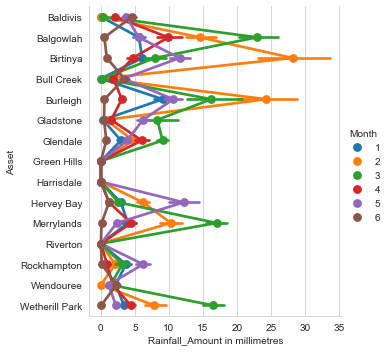

In [38]:
# Visualisation for rainfall amount on a monthly basis accourding to different assets
sns.catplot(x='Rainfall_Amount in millimetres',y='Asset',hue='Month',data=df,kind='point')

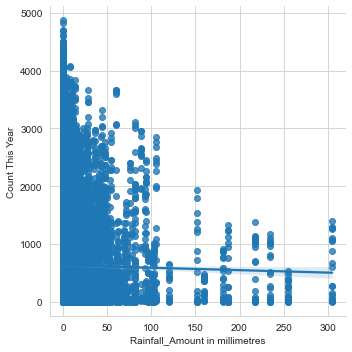

In [39]:
sns.lmplot(x='Rainfall_Amount in millimetres',y='Count This Year',fit_reg=True,data=df)

In [40]:
# Dropping the dummy columns as the data has been obtained in a single column names Rainfall_Amount in millimetres
df=df.drop(columns=['Rainfall amount (millimetres)','Rainfall amount (millimetres)_x','Rainfall amount (millimetres)_y'])

In [41]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,year,Day,Rainfall_Amount in millimetres
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,2022,1,0.0
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,2022,1,0.0
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,2022,1,0.0
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,2022,1,0.0
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,2022,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,2022,30,0.0
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,2022,30,0.0
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,2022,30,0.0
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,2022,30,0.0


<AxesSubplot:>

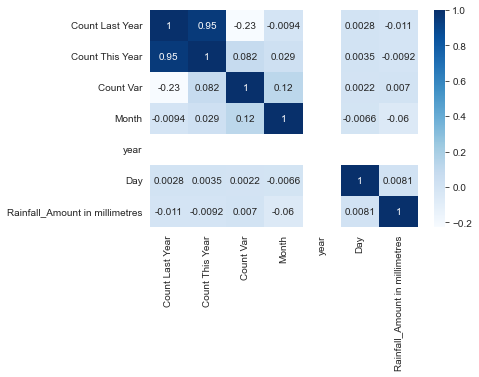

In [42]:
# Corr plot to see correlations
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

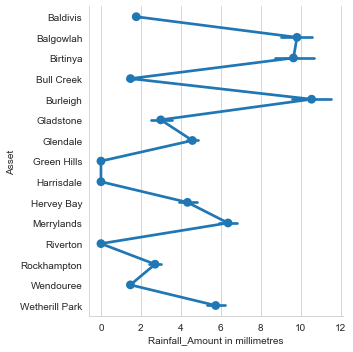

In [43]:
sns.catplot(x='Rainfall_Amount in millimetres',y='Asset',kind='point',data=df)

In [44]:
# Importing daily minimum and maximum temprature csv files downloaded from BOM(Bureau Of Meteorology)
Baldivis_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Baldivis Min Temp.csv")
Baldivis_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Baldivis Max Temp.csv")
Balgowlah_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Balgowlah Min Temp.csv")
Balgowlah_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Balgowlah Max Temp.csv")
Birtinya_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Birtinya Min Temp.csv")
Birtinya_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Birtinya Max Temp.csv")
BullCreek_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Min Temp.csv")
BullCreek_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Max Temp.csv")
Riverton_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Min Temp.csv")
Riverton_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Max Temp.csv")
Harrisdale_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Min Temp.csv")
Harrisdale_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Bull Creek - Riverton - Harrisdale Max Temp.csv")
Burleigh_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Burleigh Min Temp.csv")
Burleigh_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Burleigh Max Temp.csv")
Gladstone_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Gladstone Min Temp.csv")
Gladstone_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Gladstone Max Temp.csv")
Glendale_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Glendale Min Temp.csv")
Glendale_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Glendale Max Temp.csv")
GreenHills_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Green Hills Min Temp.csv")
GreenHills_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Green Hills Max Temp.csv")
HerveyBay_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Hervey Bay Min Temp.csv")
HerveyBay_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Hervey Bay Max Temp.csv")
Merrylands_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Merrylands Min Temp.csv")
Merrylands_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Merrylands Max Temp.csv")
Rockhampton_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Rockhampton Min Temp.csv")
Rockhampton_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Rockhampton Max Temp.csv")
Wendouree_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Wendouree Min Temp.csv")
Wendouree_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Wendouree Max Temp.csv")
WetherillPark_Min_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Wetherill Park Min Temp.csv")
WetherillPark_Max_temp= pd.read_csv("/Users/mithil800/Documents/Temprature Data/Wetherill Park Max Temp.csv")


In [45]:
# Creating an asset column to be able to merge them accourding to assets
Baldivis_Min_temp['Asset']='Baldivis'
Baldivis_Max_temp['Asset']='Baldivis'
Balgowlah_Min_temp['Asset']='Balgowlah'
Balgowlah_Max_temp['Asset']='Balgowlah'
Birtinya_Min_temp['Asset']='Birtinya'
Birtinya_Max_temp['Asset']='Birtinya'
BullCreek_Min_temp['Asset']='Bull Creek'
BullCreek_Max_temp['Asset']='Bull Creek'
Riverton_Min_temp['Asset']='Riverton'
Riverton_Max_temp['Asset']='Riverton'
Harrisdale_Min_temp['Asset']='Harrisdale'
Harrisdale_Max_temp['Asset']='Harrisdale'
Burleigh_Min_temp['Asset']='Burleigh'
Burleigh_Max_temp['Asset']='Burleigh'
Gladstone_Min_temp['Asset']='Gladstone'
Gladstone_Max_temp['Asset']='Gladstone'
Glendale_Min_temp['Asset']='Glendale'
Glendale_Max_temp['Asset']='Glendale'
GreenHills_Min_temp['Asset']='Green Hills'
GreenHills_Max_temp['Asset']='Green Hills'
HerveyBay_Min_temp['Asset']='Hervey Bay'
HerveyBay_Max_temp['Asset']='Hervey Bay'
Merrylands_Min_temp['Asset']='Merrylands'
Merrylands_Max_temp['Asset']='Merrylands'
Rockhampton_Min_temp['Asset']='Rockhampton'
Rockhampton_Max_temp['Asset']='Rockhampton'
Wendouree_Min_temp['Asset']='Wendouree'
Wendouree_Max_temp['Asset']='Wendouree'
WetherillPark_Min_temp['Asset']='Wetherill Park'
WetherillPark_Max_temp['Asset']='Wetherill Park'

In [46]:
Baldivis_Max_temp
Baldivis_Min_temp

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality,Asset
0,IDCJAC0011,9256,2022,1,1,17.3,1.0,Y,Baldivis
1,IDCJAC0011,9256,2022,1,2,17.1,1.0,Y,Baldivis
2,IDCJAC0011,9256,2022,1,3,19.0,1.0,Y,Baldivis
3,IDCJAC0011,9256,2022,1,4,18.6,1.0,Y,Baldivis
4,IDCJAC0011,9256,2022,1,5,18.8,1.0,Y,Baldivis
...,...,...,...,...,...,...,...,...,...
286,IDCJAC0011,9256,2022,10,14,8.7,1.0,Y,Baldivis
287,IDCJAC0011,9256,2022,10,15,9.7,1.0,N,Baldivis
288,IDCJAC0011,9256,2022,10,16,13.9,1.0,N,Baldivis
289,IDCJAC0011,9256,2022,10,17,12.6,1.0,N,Baldivis


In [47]:
# Merging left(df) and right(Minimum temprature dataframes) according to similar columns namely asset, month and day
df= df.merge(Baldivis_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Balgowlah_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Birtinya_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(BullCreek_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Riverton_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Harrisdale_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Burleigh_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Gladstone_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Glendale_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(GreenHills_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(HerveyBay_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Merrylands_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Rockhampton_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Wendouree_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(WetherillPark_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day'])

/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/1390059514.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Minimum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/1390059514.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Minimum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_Min_temp[['Asset','Month','Day','Minimum temperature (Degree C)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/1390059514.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Minimum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.me

In [48]:
# Dtaframe with minimum temprature dummy columns
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,...,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3


In [49]:
df=df.fillna(0)
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,...,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)_x,Minimum temperature (Degree C)_y,Minimum temperature (Degree C)
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3


In [50]:
# obtaining the sum of these columns into one column named Minimum temperature Degree C
df['Minimum temperature Degree C']= df[['Minimum temperature (Degree C)_y','Minimum temperature (Degree C)_x','Minimum temperature (Degree C)']].sum(axis=1)

In [51]:
# Dropping dummy columns since data has been transferred to single column
df=df.drop(columns=['Minimum temperature (Degree C)_y','Minimum temperature (Degree C)_x','Minimum temperature (Degree C)'])

In [52]:
Baldivis_Max_temp

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Asset
0,IDCJAC0010,9256,2022,1,1,23.7,1.0,Y,Baldivis
1,IDCJAC0010,9256,2022,1,2,26.1,1.0,Y,Baldivis
2,IDCJAC0010,9256,2022,1,3,24.7,1.0,Y,Baldivis
3,IDCJAC0010,9256,2022,1,4,30.7,1.0,Y,Baldivis
4,IDCJAC0010,9256,2022,1,5,31.2,1.0,Y,Baldivis
...,...,...,...,...,...,...,...,...,...
285,IDCJAC0010,9256,2022,10,13,17.4,1.0,Y,Baldivis
286,IDCJAC0010,9256,2022,10,14,19.2,1.0,N,Baldivis
287,IDCJAC0010,9256,2022,10,15,18.5,1.0,N,Baldivis
288,IDCJAC0010,9256,2022,10,16,19.6,1.0,N,Baldivis


In [53]:
# Performig a similar merge with maximum temprature this time
df= df.merge(Baldivis_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Balgowlah_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Birtinya_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(BullCreek_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Riverton_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Harrisdale_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Burleigh_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Gladstone_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Glendale_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(GreenHills_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(HerveyBay_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Merrylands_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Rockhampton_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(Wendouree_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day']).merge(WetherillPark_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
                left_on =['Asset','Month','Day'], right_on = ['Asset','Month','Day'])

/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2291409053.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Maximum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2291409053.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Maximum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.merge(Baldivis_Max_temp[['Asset','Month','Day','Maximum temperature (Degree C)']], how = 'left',
/var/folders/lq/1vh287hj24jbvdpptpg2klgr0000gn/T/ipykernel_6320/2291409053.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Maximum temperature (Degree C)_x'} in the result is deprecated and will raise a MergeError in a future version.
  df= df.me

In [54]:
# Dataframe with maximum temprature dummy columns
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,...,Maximum temperature (Degree C)_y,Maximum temperature (Degree C)_x,Maximum temperature (Degree C)_y,Maximum temperature (Degree C)_x,Maximum temperature (Degree C)_y,Maximum temperature (Degree C)_x,Maximum temperature (Degree C)_y,Maximum temperature (Degree C)_x,Maximum temperature (Degree C)_y,Maximum temperature (Degree C)
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4


In [55]:
# Obtaining the sum of all dummy columns into a single column named Maximum temperature Degree C
df['Maximum temperature Degree C']= df[['Maximum temperature (Degree C)_y','Maximum temperature (Degree C)_x','Maximum temperature (Degree C)']].sum(axis=1)

In [56]:
# Deleting maximum temperature dummy columns
df=df.drop(columns=['Maximum temperature (Degree C)_y','Maximum temperature (Degree C)_x','Maximum temperature (Degree C)'])

In [57]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,year,Day,Rainfall_Amount in millimetres,Minimum temperature Degree C,Maximum temperature Degree C
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4


In [58]:
# Creating an average temprature column by adding maximum and minimum temprature columns and dividing them by 2
df['Average_Temp']= (df['Minimum temperature Degree C']+ df['Maximum temperature Degree C'])/2

In [59]:
df

,Asset,Date,Time,Count Last Year,Count This Year,Count Var,Month,Suburb Areas,State,Weather Station,year,Day,Rainfall_Amount in millimetres,Minimum temperature Degree C,Maximum temperature Degree C,Average_Temp
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7,20.50
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7,20.50
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7,20.50
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7,20.50
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,2022,1,0.0,17.3,23.7,20.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4,12.35
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4,12.35
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4,12.35
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,2022,30,0.0,8.3,16.4,12.35


In [60]:
# Renaming Column names
df.rename({'Suburb Areas':'Suburb_Areas'},axis=1,inplace=True)
df.rename({'Rainfall_Amount in millimetres':'Rainfall_Amount_in_millimetres'},axis=1,inplace=True)
df.rename({'Count This Year':'Count_This_Year'},axis=1,inplace=True)

In [61]:
df['Average_Temp'].describe()

count    54998.000000
mean        20.422184
std          5.353399
min          0.000000
25%         16.800000
50%         21.300000
75%         24.100000
max         34.050000
Name: Average_Temp, dtype: float64

In [62]:
# Creating a function to classify temprature into categories like 'too hot', 'too cold' etc
def Climate_Name(climate):
    avg= climate
    if avg>=30:
        return 'Too Hot'
    elif avg<30 and avg>=21:
        return 'Moderately Hot'
    elif avg>=20 and avg<21:
        return'Average Temp'
    elif avg<20 and avg>=11:
        return 'Moderately Cold'
    elif avg<11:
        return 'Too Cold'
    

In [63]:
# Applying Climate_Name function on climate column
df['Climate']=df['Average_Temp'].apply(Climate_Name)

In [101]:
df

,Asset,Date,Time,Count Last Year,Count_This_Year,Count Var,Month,Suburb_Areas,State,Weather Station,...,Rainfall_Amount_in_millimetres,Minimum temperature Degree C,Maximum temperature Degree C,Average_Temp,Climate,February,March,April,May,June
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1


In [64]:
#Mapping months to crate dummy columns for multiple regression with dummy variables
map_Feb={1:0,2:1,3:0,4:0,5:0,6:0}
map_mar={1:0,2:0,3:1,4:0,5:0,6:0}
map_apr={1:0,2:0,3:0,4:1,5:0,6:0}
map_may={1:0,2:0,3:0,4:0,5:1,6:0}
map_june={1:0,2:0,3:0,4:0,5:0,6:1}

In [65]:
# Creating dummy columns
df['February']=df['Month'].map(map_Feb)
df['March']=df['Month'].map(map_mar)
df['April']=df['Month'].map(map_apr)
df['May']=df['Month'].map(map_may)
df['June']=df['Month'].map(map_june)

In [66]:
# Creating dataframes for all assets inorder to analyse each one
#Highest and Lowest Rainfall QLD Assets
Burleigh = df[df.Asset=='Burleigh']
Rockhampton= df[df.Asset=='Rockhampton']
QLD_df= df[df.State=='QLD']
#Highest and Lowest Rainfall NSW Assets
Balgowlah= df[df.Asset=='Balgowlah']
GreenHills= df[df.Asset=='Green Hills']
NSW_df= df[df.State=='NSW']
#Highest and Lowest Rainfall WA Assets
Baldivis= df[df.Asset=='Baldivis']
Riverton= df[df.Asset=='Riverton']
WA_df= df[df.State=='WA']
# Other Assets Dataframe
Birtinya= df[df.Asset=='Birtinya']
BullCreek= df[df.Asset=='Bull Creek']
Gladstone= df[df.Asset=='Gladstone']
Glendale= df[df.Asset=='Glendale']
Harrisdale= df[df.Asset=='Harrisdale']
HerveyBay= df[df.Asset=='Hervey Bay']
Merrylands= df[df.Asset=='Merrylands']
Wendouree= df[df.Asset=='Wendouree']
WetherillPark= df[df.Asset=='Wetherill Park']
# Regional and Metro Areas
Regional= df[df.Suburb_Areas=='Regional']
Metro= df[df.Suburb_Areas=='Metro']

# Regression Analysis

In [67]:
# importing linear regression
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
# Performing linear regression with x(Explanatory variable) and Y (dependent variable)
slr.fit(X=df[['Rainfall_Amount_in_millimetres']], y=df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
# Results: For every 1mm increase in rainfall, there is a decrease in visitations this year by -0.423(Slope)

Intercept: 631.472
Slope: -0.423


In [68]:
x2 = np.array([[100]]) # 2nd way of reshaping

y_hat_x_5_sklearn = slr.predict(x2)
print(f'Predicted Rainfall for X = 100mm: {y_hat_x_5_sklearn[0]:.3f}')

Predicted Rainfall for X = 100mm: 580.233


/Users/mithil800/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
slr.fit(X=df[['Rainfall_Amount_in_millimetres','Average_Temp']], y=df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Rainfall: {slr.coef_[0]:.3f}')
print(f'Average_Temp: {slr.coef_[1]:.3f}')
# Results: For every 1mm increase in rainfall there is a decrease in visitations by 0.252
# Results: For every 1 degree C increase in temprature, visitations decrease by 8.963

Intercept: 813.800
Rainfall: -0.252
Average_Temp: -8.963


In [70]:
df

,Asset,Date,Time,Count Last Year,Count_This_Year,Count Var,Month,Suburb_Areas,State,Weather Station,...,Rainfall_Amount_in_millimetres,Minimum temperature Degree C,Maximum temperature Degree C,Average_Temp,Climate,February,March,April,May,June
0,Baldivis,2022-01-01,04:00:00,12.0,9.0,-3.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
1,Baldivis,2022-01-01,05:00:00,45.0,32.0,-13.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
2,Baldivis,2022-01-01,06:00:00,19.0,112.0,93.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
3,Baldivis,2022-01-01,07:00:00,93.0,84.0,-9.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
4,Baldivis,2022-01-01,08:00:00,776.0,283.0,-493.0,1,Regional,WA,Hopelands,...,0.0,17.3,23.7,20.50,Average Temp,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,Wetherill Park,2022-06-30,19:00:00,693.0,3030.0,2337.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54994,Wetherill Park,2022-06-30,20:00:00,476.0,2812.0,2336.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54995,Wetherill Park,2022-06-30,21:00:00,270.0,2429.0,2159.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1
54996,Wetherill Park,2022-06-30,22:00:00,41.0,856.0,815.0,6,Metro,NSW,Horsley Park,...,0.0,8.3,16.4,12.35,Moderately Cold,0,0,0,0,1


In [71]:
# WA Highest(Baldivis) Regression Analysis
slr.fit(X=Baldivis[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Baldivis['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 626.406
Slope: 0.625
Slope: -0.752


In [72]:
# WA Lowest(Riverton) Regression Analysis
slr.fit(X=Riverton[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Riverton['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 508.819
Slope: 0.000
Slope: 1.156


In [73]:
# WA State regression analysis
slr.fit(X=WA_df[['Rainfall_Amount_in_millimetres','Average_Temp']], y=WA_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 454.486
Slope: 3.546
Slope: 0.403


In [74]:
# QLD Highest Rainfall Asset(Burleigh) regression analysis
slr.fit(X=Burleigh[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Burleigh['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 497.185
Slope: -0.279
Slope: 0.952


In [75]:
# QLD Lowest Rainfall Asset(Rockhampton) regression analysis
slr.fit(X=Rockhampton[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Rockhampton['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 776.755
Slope: 0.710
Slope: -4.044


In [76]:
# QLD State regression analysis
slr.fit(X=QLD_df[['Rainfall_Amount_in_millimetres','Average_Temp']], y=QLD_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 442.229
Slope: -0.653
Slope: 3.636


In [77]:
# NSW Highest Rainfall Asset(Balgowlah) regression analysis
slr.fit(X=Balgowlah[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Balgowlah['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 436.006
Slope: 0.403
Slope: -2.458


In [78]:
# NSW Lowest Rainfall Asset(Green Hills) regression analysis
slr.fit(X=GreenHills[['Rainfall_Amount_in_millimetres','Average_Temp']], y=GreenHills['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 1291.124
Slope: 0.000
Slope: -9.405


In [79]:
# NSW state Regression Analysis
slr.fit(X=NSW_df[['Rainfall_Amount_in_millimetres','Average_Temp']], y=NSW_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 1074.749
Slope: -1.384
Slope: -12.209


# Other Assets Regression

In [80]:
# Birtinya regression Analysis
slr.fit(X=Birtinya[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Birtinya['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 253.423
Slope: -0.106
Slope: 0.724


In [81]:
# BullCreek regression Analysis
slr.fit(X=BullCreek[['Rainfall_Amount_in_millimetres','Average_Temp']], y=BullCreek['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 381.543
Slope: 0.731
Slope: -1.070


In [82]:
# Gladstone regression Analysis
slr.fit(X=Gladstone[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Gladstone['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 631.725
Slope: 0.422
Slope: -4.402


In [83]:
# Glendale regression Analysis
slr.fit(X=Glendale[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Glendale['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 538.487
Slope: 1.200
Slope: -1.773


In [84]:
# Harrisdale regression Analysis
slr.fit(X=Harrisdale[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Harrisdale['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 284.333
Slope: 0.000
Slope: 2.988


In [85]:
# Hervey Bay regression Analysis
slr.fit(X=HerveyBay[['Rainfall_Amount_in_millimetres','Average_Temp']], y=HerveyBay['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 518.619
Slope: 0.056
Slope: 1.697


In [86]:
# Merrylands regression Analysis
slr.fit(X=Merrylands[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Merrylands['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 1301.776
Slope: 1.062
Slope: -8.448


In [87]:
# Wendouree regression Analysis
slr.fit(X=Wendouree[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Wendouree['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 558.002
Slope: 0.698
Slope: -1.639


In [88]:
# Wetherill Park regression Analysis
slr.fit(X=WetherillPark[['Rainfall_Amount_in_millimetres','Average_Temp']], y=WetherillPark['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 1073.995
Slope: 1.486
Slope: -7.882


# Regional and Metro Area Regression

In [89]:
slr.fit(X=Regional[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Regional['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 647.046
Slope: -1.139
Slope: -3.690


In [90]:
slr.fit(X=Metro[['Rainfall_Amount_in_millimetres','Average_Temp']], y=Metro['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')

Intercept: 1102.556
Slope: -0.372
Slope: -13.100


In [91]:
# Analysing Assets in NSW cause NSW is the most affected by Temprature

In [92]:
#df.to_excel('Mithil.xlsx')

In [93]:
slr.fit(X=df[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 917.178
Slope: -0.387
Slope: -13.380
Slope: 17.656
Slope: 19.516
Slope: 9.386
Slope: -43.310
Slope: -78.097


In [94]:
slr.fit(X=Metro[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=Metro['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 1075.481
Slope: -1.130
Slope: -16.073
Slope: 120.685
Slope: 165.326
Slope: 140.176
Slope: 77.907
Slope: 29.694


In [95]:
slr.fit(X=Regional[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=Regional['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 678.504
Slope: -1.126
Slope: -4.865
Slope: -0.826
Slope: -4.876
Slope: 8.960
Slope: -19.761
Slope: -24.694


In [96]:
slr.fit(X=QLD_df[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=QLD_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 138.440
Slope: -0.426
Slope: 14.001
Slope: 28.535
Slope: 21.883
Slope: 71.210
Slope: 88.784
Slope: 175.183


In [97]:
slr.fit(X=NSW_df[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=NSW_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 1156.335
Slope: -2.028
Slope: -18.420
Slope: 80.497
Slope: 110.222
Slope: 78.464
Slope: 10.121
Slope: -39.273


In [98]:
slr.fit(X=WA_df[['Rainfall_Amount_in_millimetres','Average_Temp','February','March','April','May','June']], y=WA_df['Count_This_Year'])

print(f'Intercept: {slr.intercept_:.3f}')
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Slope: {slr.coef_[1]:.3f}')
print(f'Slope: {slr.coef_[2]:.3f}')
print(f'Slope: {slr.coef_[3]:.3f}')
print(f'Slope: {slr.coef_[4]:.3f}')
print(f'Slope: {slr.coef_[5]:.3f}')
print(f'Slope: {slr.coef_[6]:.3f}')

Intercept: 517.071
Slope: 3.800
Slope: -0.903
Slope: -37.512
Slope: -55.442
Slope: -18.176
Slope: -50.832
Slope: -50.464


# Plots

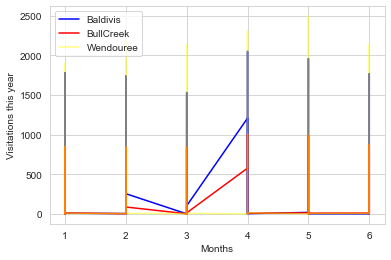

In [99]:
plt.plot(Baldivis.Month,Baldivis.Count_This_Year,color='blue')
plt.plot(BullCreek.Month,BullCreek.Count_This_Year,color='red')
plt.plot(Wendouree.Month,Wendouree.Count_This_Year,color='yellow',alpha=0.5)
plt.xlabel('Months')
plt.ylabel('Visitations this year')
plt.legend(['Baldivis','BullCreek','Wendouree'])
plt.show()